In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [115]:
cookie_cats = pd.read_csv('cookie_cats.csv')

In [116]:
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [117]:
cookie_cats.shape

(90189, 5)

In [118]:
cookie_cats.userid.nunique()

90189

In [119]:
sample_sizes = cookie_cats[['version','userid']].groupby('version', as_index = False).agg('count')
sample_sizes

,version,userid
0,gate_30,44700
1,gate_40,45489


In [120]:
gamerounds_by_version = cookie_cats[['version','sum_gamerounds']]
gamerounds_by_version

,version,sum_gamerounds
0,gate_30,3
1,gate_30,38
2,gate_40,165
3,gate_40,1
4,gate_40,179
...,...,...
90184,gate_40,97
90185,gate_40,30
90186,gate_30,28
90187,gate_40,51


In [121]:
gamerounds_by_version.groupby('version',as_index=False).agg(['min','mean',np.median,'max', np.std])

sum_gamerounds                                     
                   min       mean median    max         std
version                                                    
gate_30              0  52.456264     17  49854  256.716423
gate_40              0  51.298776     16   2640  103.294416

In [124]:
len(gamerounds_by_version[gamerounds_by_version.sum_gamerounds == 0])

3994

In [125]:
len(gamerounds_by_version[gamerounds_by_version.sum_gamerounds == gamerounds_by_version.sum_gamerounds.max()])

1

In [141]:
rev_gr_byv = gamerounds_by_version[gamerounds_by_version.sum_gamerounds < gamerounds_by_version.sum_gamerounds.max()]
rev_gr_byv = rev_gr_byv[rev_gr_byv.sum_gamerounds > 30]
rev_gr_byv


,version,sum_gamerounds
1,gate_30,38
2,gate_40,165
4,gate_40,179
5,gate_40,187
8,gate_40,108
...,...,...
90171,gate_30,84
90177,gate_40,53
90178,gate_40,32
90184,gate_40,97


In [142]:
rev2cc = rev_gr_byv.pivot(values='sum_gamerounds',columns = 'version')
rev2cc

version,gate_30,gate_40
1,38.0,NaN
2,NaN,165.0
4,NaN,179.0
5,NaN,187.0
8,NaN,108.0
...,...,...
90171,84.0,NaN
90177,NaN,53.0
90178,NaN,32.0
90184,NaN,97.0


<AxesSubplot:>

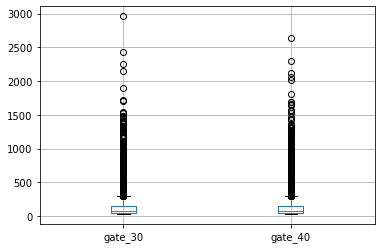

In [144]:
rev2cc.boxplot()

In [131]:
rev_cookiecats.describe()

,sum_gamerounds
count,32626.00000
mean,125.11356
std,143.16099
min,31.00000
25%,46.00000
50%,75.00000
75%,146.00000
max,2961.00000


In [145]:
rev3cc = rev_cookiecats.groupby('sum_gamerounds', as_index=False).agg('count')

<AxesSubplot:xlabel='sum_gamerounds'>

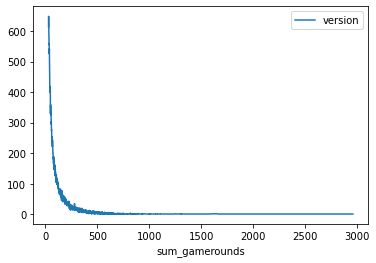

In [137]:
rev3cc.plot('sum_gamerounds','version')

**Creating Bootstrap Sample**

In [340]:
rev_cc = cookie_cats[cookie_cats.sum_gamerounds < gamerounds_by_version.sum_gamerounds.max()]
rev_cc = rev_cc[rev_cc.sum_gamerounds >= 30]
rev_cc

,userid,version,sum_gamerounds,retention_1,retention_7
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True
...,...,...,...,...,...
90177,9998376,gate_40,53,False,False
90178,9998555,gate_40,32,False,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False


In [363]:
gate_30_sample = rev_cc[rev_cc.version == 'gate_30']
gate_40_sample = rev_cc[(rev_cc.version == 'gate_40') & (rev_cc.sum_gamerounds >= 40)]

In [364]:
gate_40_sample

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False
...,...,...,...,...,...
90159,9996209,gate_40,40,True,False
90167,9997037,gate_40,44,False,False
90177,9998376,gate_40,53,False,False
90184,9999441,gate_40,97,True,False


In [365]:
def retention_rate_1(tbl):
    rr_1 = (tbl.retention_1.value_counts() / len(tbl.retention_1))[1]
    return rr_1
def retention_rate_7(tbl):
    rr_7 = (tbl.retention_7.value_counts() / len(tbl.retention_7))[1]
    return rr_7

In [366]:
rev_cc.sample(len(rev_cc))

,userid,version,sum_gamerounds,retention_1,retention_7
55512,6156018,gate_40,42,False,False
17362,1932422,gate_30,47,True,False
24140,2687172,gate_40,311,True,True
4213,467863,gate_30,94,True,True
66104,7320346,gate_30,175,True,True
...,...,...,...,...,...
1877,203623,gate_40,123,True,False
59726,6613882,gate_30,104,True,False
59944,6637902,gate_30,33,False,False
40477,4477436,gate_40,80,True,False


In [367]:
def one_bootstrap_rr1_g30():
    return retention_rate_1(resample(gate_30_sample, replace = True))

def one_bootstrap_rr1_g40():
    return retention_rate_1(resample(gate_40_sample, replace = True))

In [368]:
bootstrap_rrs1_g30 = ()
for i in np.arange(1000):
    new_bootstrap_rr = one_bootstrap_rr1_g30()
    bootstrap_rrs1_g30 = np.append(bootstrap_rrs1_g30, new_bootstrap_rr)
bootstrap_rrs1_g30

array([0.80102071, 0.79675773, 0.80198139, 0.80276193, 0.80264185,
       0.80138097, 0.80204143, 0.79867908, 0.79969979, 0.80084059,
       0.7965776 , 0.79195437, 0.80582408, 0.80180126, 0.80354248,
       0.79711798, 0.80102071, 0.79879916, 0.79825878, 0.80306214,
       0.8011408 , 0.79921945, 0.80156109, 0.79843891, 0.79831882,
       0.79981987, 0.80474332, 0.79789853, 0.80126088, 0.80042029,
       0.80366256, 0.80366256, 0.80270189, 0.80336235, 0.80402282,
       0.80132092, 0.80132092, 0.80132092, 0.80390273, 0.8018613 ,
       0.80312219, 0.807145  , 0.79945962, 0.80630441, 0.80408286,
       0.8041429 , 0.79909937, 0.79951966, 0.79933954, 0.80468328,
       0.80354248, 0.79987992, 0.79879916, 0.80090063, 0.8011408 ,
       0.7981387 , 0.80144101, 0.79543681, 0.79945962, 0.80366256,
       0.80480336, 0.8060042 , 0.79987992, 0.80234164, 0.79975983,
       0.80372261, 0.79801861, 0.80330231, 0.80282198, 0.79663765,
       0.79921945, 0.79783849, 0.79693786, 0.80156109, 0.79927

In [369]:
bootstrap_rrs1_g40 = ()
for i in np.arange(100):
    new_bootstrap_rr = one_bootstrap_rr1_g40()
    bootstrap_rrs1_g40 = np.append(bootstrap_rrs1_g40, new_bootstrap_rr)
bootstrap_rrs1_g40

array([0.82129168, 0.83127215, 0.83018731, 0.8346713 , 0.82237651,
       0.82751139, 0.83344182, 0.83004267, 0.8291748 , 0.82888551,
       0.82845158, 0.83264627, 0.82534172, 0.82780068, 0.8291748 ,
       0.83214002, 0.82845158, 0.8272221 , 0.82960874, 0.83127215,
       0.83069357, 0.83300788, 0.82845158, 0.8346713 , 0.82555869,
       0.83098286, 0.83025964, 0.83387575, 0.82707746, 0.82700513,
       0.82823461, 0.83684096, 0.83040428, 0.82931945, 0.83033196,
       0.83235698, 0.83127215, 0.82888551, 0.82830694, 0.83018731,
       0.82476314, 0.8298257 , 0.82931945, 0.83807044, 0.83430968,
       0.83640703, 0.83344182, 0.83402039, 0.82729442, 0.8304766 ,
       0.827873  , 0.83503291, 0.83134447, 0.82895784, 0.82895784,
       0.83054893, 0.82939177, 0.83054893, 0.82548637, 0.83091054,
       0.82729442, 0.8317784 , 0.82968106, 0.82353367, 0.83380343,
       0.83004267, 0.83025964, 0.83561148, 0.82924713, 0.83344182,
       0.82743907, 0.8285239 , 0.82801765, 0.82490779, 0.83047

In [370]:
rr1_ci_left_g30 = percentile(0.5, bootstrap_rrs1_g30)
rr1_ci_right_g30 = percentile(99.5, bootstrap_rrs1_g30)
print("Middle 99% of bootstrappped retention rates for people with a gate at level 30 for 1 day: [{:f}, {:f}]".format(rr1_ci_left_g30, rr1_ci_right_g30))

Middle 99% of bootstrappped retention rates for people with a gate at level 30 for 1 day: [0.792615, 0.809066]


In [371]:
rr1_ci_left_g40 = percentile(0.5, bootstrap_rrs1_g40)
rr1_ci_right_g40 = percentile(99.5, bootstrap_rrs1_g40)
print("Middle 99% of bootstrappped retention rates for people with a gate at level 40 for 1 day: [{:f}, {:f}]".format(rr1_ci_left_g40, rr1_ci_right_g40))

Middle 99% of bootstrappped retention rates for people with a gate at level 40 for 1 day: [0.821292, 0.840312]


In [372]:
def one_bootstrap_rr7_g30():
    return retention_rate_7(resample(gate_30_sample, replace = True))

def one_bootstrap_rr7_g40():
    return retention_rate_7(resample(gate_40_sample, replace = True))

In [ ]:
bootstrap_rrs7_g30 = ()
for i in np.arange(100):
    new_bootstrap_rr = one_bootstrap_rr7_g30()
    bootstrap_rrs7_g30 = np.append(bootstrap_rrs7_g30, new_bootstrap_rr)
bootstrap_rrs7_g30

In [ ]:
bootstrap_rrs7_g40 = ()
for i in np.arange(100):
    new_bootstrap_rr = one_bootstrap_rr7_g40()
    bootstrap_rrs7_g40 = np.append(bootstrap_rrs7_g40, new_bootstrap_rr)
bootstrap_rrs7_g40

In [ ]:
rr7_ci_left_g30 = percentile(0.5, bootstrap_rrs7_g30)
rr7_ci_right_g30 = percentile(99.5, bootstrap_rrs7_g30)
print("Middle 99% of bootstrappped retention rates for level 30 after 7 days: [{:f}, {:f}]".format(rr7_ci_left_g30, rr7_ci_right_g30))


In [ ]:
rr7_ci_left_g40 = percentile(0.5, bootstrap_rrs7_g40)
rr7_ci_right_g40 = percentile(99.5, bootstrap_rrs7_g40)
print("Middle 99% of bootstrappped retention rates for level 30 after 7 days: [{:f}, {:f}]".format(rr7_ci_left_g40, rr7_ci_right_g40))